## EDA a megtisztított adatokon embedding előtt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Plot stílus beállítása
sns.set_style('whitegrid')
%matplotlib inline

### Adatok betöltése és alapvető információk

In [2]:
# Adatfájl betöltése
file_path = '/Users/zelenyianszkimate/Documents/CourtRankRL/processed_temp_data/cleaned_documents_local.parquet'
df = pd.read_parquet(file_path)

# Alapvető információk
print(df.info())
print("\nAz adatsor első 5 sora:")
df.head()
df['text'][:1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216587 entries, 0 to 216586
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   doc_id                 216587 non-null  object 
 1   text                   216587 non-null  object 
 2   birosag                216587 non-null  object 
 3   JogTerulet             216304 non-null  object 
 4   Azonosito              216305 non-null  object 
 5   MeghozoBirosag         216305 non-null  object 
 6   EgyediAzonosito        216305 non-null  object 
 7   HatarozatEve           216305 non-null  float64
 8   AllKapcsolodoUgyszam   176998 non-null  object 
 9   AllKapcsolodoBirosag   176998 non-null  object 
 10  KapcsolodoHatarozatok  216305 non-null  object 
 11  Jogszabalyhelyek       216305 non-null  object 
 12  Kollegium              216305 non-null  object 
 13  Rezume                 106291 non-null  object 
 14  IndexelesIdeje         216305 non-nu

0    A GYÖNGYÖSI VÁROSI BIRÓSÁG 3.G.21.002/2009/17....
Name: text, dtype: object

# Az első 'text' oszlop teljes tartalmának kiírása

In [3]:
if 'text' in df.columns:
    pd.set_option('display.max_colwidth', None)
    print("\nAz első dokumentum szövege ('text' oszlop):")
    print(df.loc[0, 'text'])
else:
    print("Nincs 'text' oszlop az adatkeretben.")


Az első dokumentum szövege ('text' oszlop):
A GYÖNGYÖSI VÁROSI BIRÓSÁG 3.G.21.002/2009/17. szám A MAGYAR KÖZTÁRSASÁG NEVÉBEN ! A Gyöngyösi Városi Bíróság Dr. Berzétei Ákos ügyvéd által képviselt felperesnek - Dr. Tiber Péter ügyvéd által képviselt alperes ellen 3.790.225.-Ft és jár. megfizetése iránt indított perében meghozta az alábbi í t é l e t e t : A bíróság kötelezi az alperest, hogy fizessen meg a felperesnek 15 napon belül 3.610.010.-/Három-millió-hatszáztízezer-tíz/ Ft-ot és ennek az összegnek 2009. augusztus 21. napjától a kifizetés napjáig járó mindenkori törvényes mértékű kamatát is /a késedelemmel érintett naptári félévet megelőző utolsó napon érvényes jegybanki alapkamat 7 %-kal növelt mértékű kamatát/. A bíróság kötelezi az alperest arra is, hogy fizessen meg a felperesnek 15 napon belül 180.500.-/Egyszáznyolcvan-ezer-ötszáz/ Ft + ÁFA összegű képviseleti munkadíjat és az Állam javára - az adóhatóság külön felhívására - 216.600.-/Kettőszáztizenhat-ezer-hatszáz/ Ft le nem

In [4]:
# Hiányzó értékek ellenőrzése
print("Hiányzó értékek száma oszloponként:")
print(df.isnull().sum())

Hiányzó értékek száma oszloponként:
doc_id                        0
text                          0
birosag                       0
JogTerulet                  283
Azonosito                   282
MeghozoBirosag              282
EgyediAzonosito             282
HatarozatEve                282
AllKapcsolodoUgyszam      39589
AllKapcsolodoBirosag      39589
KapcsolodoHatarozatok       282
Jogszabalyhelyek            282
Kollegium                   282
Rezume                   110296
IndexelesIdeje              282
IndexId                     282
dtype: int64


### Szöveghossz elemzése

Vizsgáljuk meg a szövegek hosszának eloszlását (karakterek és szavak száma szerint). Ez fontos, mert sok embedding modellnek van maximális input hossza.

In [5]:
# Szöveg oszlop nevének feltételezése. Ha más, itt kell átírni.
TEXT_COLUMN = 'text' # Vagy 'cleaned_text', 'szoveg', stb.

if TEXT_COLUMN in df.columns and df[TEXT_COLUMN].notna().all():
    # Karakterek száma
    df['karakter_szam'] = df[TEXT_COLUMN].astype(str).apply(len)
    
    # Szavak száma
    df['szo_szam'] = df[TEXT_COLUMN].astype(str).apply(lambda x: len(x.split()))
    
    print("Szöveghossz statisztikák:")
    print(df[['karakter_szam', 'szo_szam']].describe())
else:
    print(f"A(z) '{TEXT_COLUMN}' oszlop nem található, vagy hiányos adatokat tartalmaz. Kérlek, add meg a helyes oszlopnevet.")
    print("Elérhető oszlopok:", df.columns.tolist())

Szöveghossz statisztikák:
       karakter_szam       szo_szam
count   2.165870e+05  216587.000000
mean    2.616497e+04    3467.224829
std     3.348226e+04    4526.703643
min     1.540000e+02      15.000000
25%     1.287700e+04    1702.000000
50%     1.935400e+04    2552.000000
75%     2.984000e+04    3929.000000
max     1.557475e+06  222545.000000


### Eloszlások vizualizációja

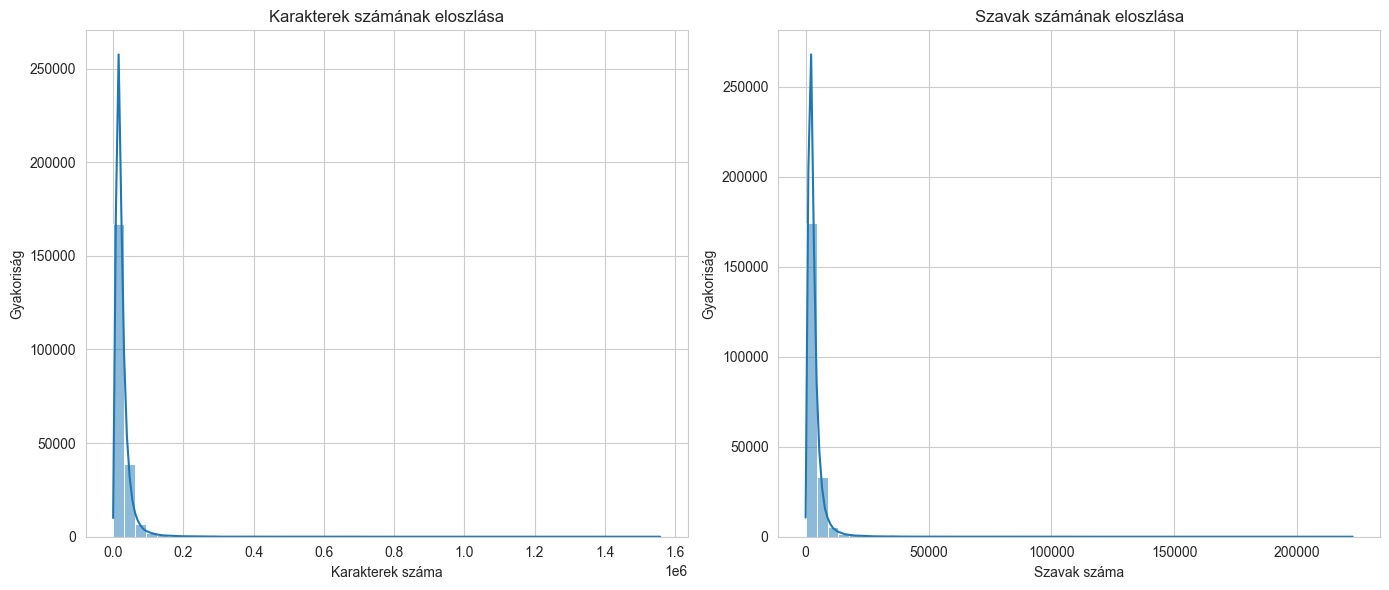

In [6]:
if 'karakter_szam' in df.columns and 'szo_szam' in df.columns:
    plt.figure(figsize=(14, 6))

    # Karakterek számának eloszlása
    plt.subplot(1, 2, 1)
    sns.histplot(df['karakter_szam'], bins=50, kde=True)
    plt.title('Karakterek számának eloszlása')
    plt.xlabel('Karakterek száma')
    plt.ylabel('Gyakoriság')

    # Szavak számának eloszlása
    plt.subplot(1, 2, 2)
    sns.histplot(df['szo_szam'], bins=50, kde=True)
    plt.title('Szavak számának eloszlása')
    plt.xlabel('Szavak száma')
    plt.ylabel('Gyakoriság')

    plt.tight_layout()
    plt.show()
else:
    print("A hosszelemzéshez szükséges oszlopok nem léteznek.")

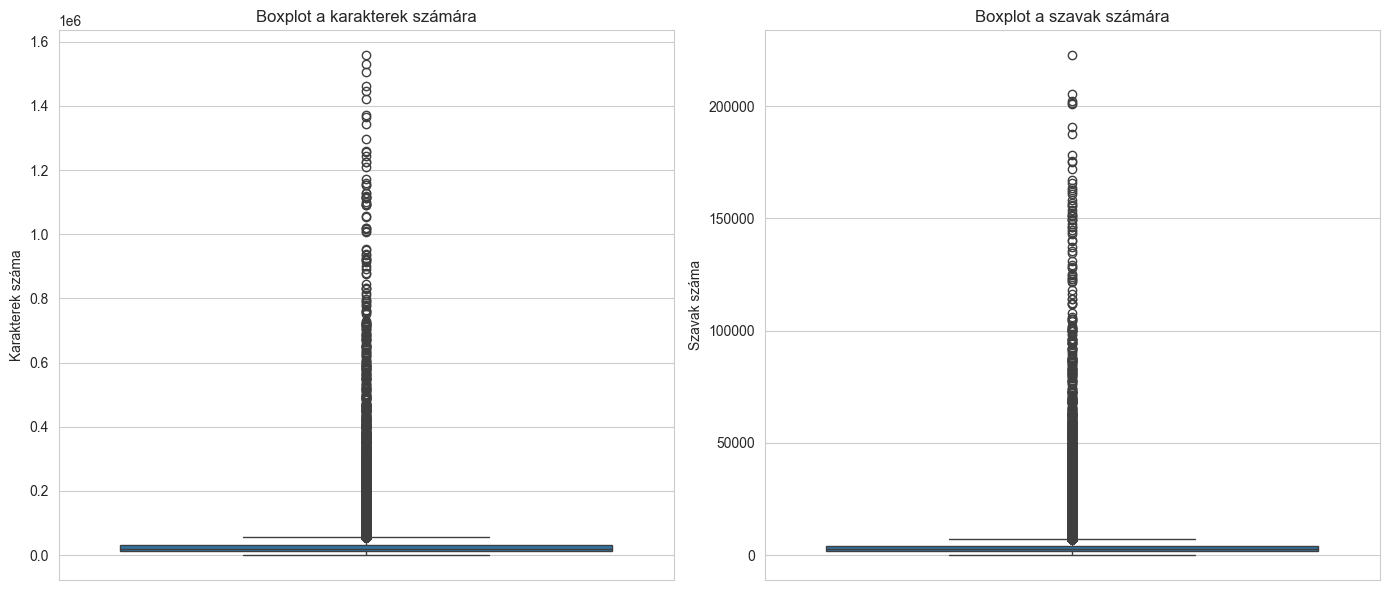

In [7]:
if 'karakter_szam' in df.columns and 'szo_szam' in df.columns:
    plt.figure(figsize=(14, 6))

    # Boxplot a karakterek számára
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['karakter_szam'])
    plt.title('Boxplot a karakterek számára')
    plt.ylabel('Karakterek száma')

    # Boxplot a szavak számára
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['szo_szam'])
    plt.title('Boxplot a szavak számára')
    plt.ylabel('Szavak száma')

    plt.tight_layout()
    plt.show()
else:
    print("A hosszelemzéshez szükséges oszlopok nem léteznek.")

### Gyakori szavak elemzése

Megnézzük a leggyakoribb szavakat a megtisztított szövegekben, hogy lássuk, maradtak-e benne felesleges szavak (pl. töltelékszavak, amiket a tisztítás nem szedett ki).

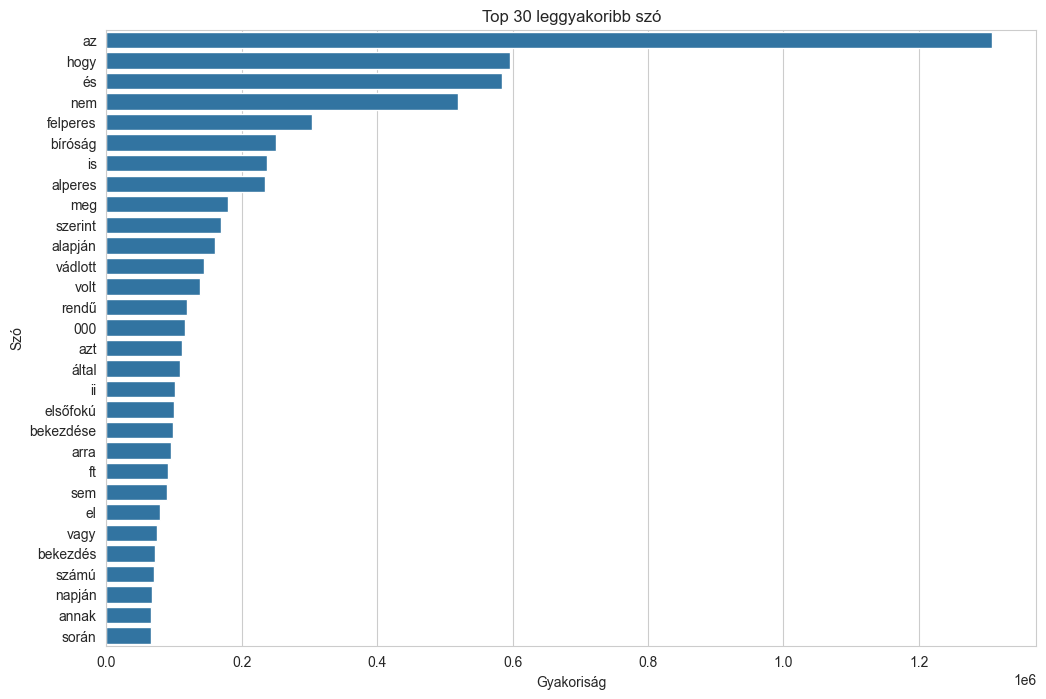

In [8]:
if TEXT_COLUMN in df.columns and df[TEXT_COLUMN].notna().all():
    # Mivel nagy lehet az adathalmaz, vegyünk egy mintát a gyakori szavak elemzéséhez, ha szükséges
    sample_df = df.sample(n=min(len(df), 10000), random_state=42)

    vectorizer = CountVectorizer(max_features=30)
    X = vectorizer.fit_transform(sample_df[TEXT_COLUMN].astype(str))
    
    word_freq = pd.DataFrame({
        'szo': vectorizer.get_feature_names_out(),
        'gyakorisag': X.sum(axis=0).getA1()
    }).sort_values('gyakorisag', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='gyakorisag', y='szo', data=word_freq)
    plt.title('Top 30 leggyakoribb szó')
    plt.xlabel('Gyakoriság')
    plt.ylabel('Szó')
    plt.show()
else:
    print(f"A(z) '{TEXT_COLUMN}' oszlop nem található, vagy hiányos adatokat tartalmaz.")

### Következtetések

Itt lehet összefoglalni az elemzés eredményeit és a további lépéseket.